# <span style="color:royalblue"> [5주차] 2024 데이터 마트 만들기</span> 
# 2023 부동산 매매가격 예측 모델링을 위한 데이터 전처리

--- 

<div style="text-align: right"> Final Edition : 2024.1.27<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

## [1주차] 부동산 시장 Domain Knowledge 습득_read_csv, melt, split, replace

In [2]:
import pandas as pd
import numpy as np

In [4]:
df_price = pd.read_csv("data/주택매매가격지수_시도_시_군_구__20240118223344.csv", encoding="cp949")#utf-8
df_price

,행정구역별,2003.11,2003.12,2004.01,2004.02,2004.03,2004.04,2004.05,2004.06,2004.07,...,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,2023.09,2023.10,2023.11
0,전국,61.5,61.0,60.7,60.7,60.8,60.9,60.9,60.8,60.6,...,97.1,96.3,95.9,95.7,95.6,95.7,95.8,96.0,96.2,96.3
1,서울특별시,55.6,55.2,55.1,55.3,55.5,55.7,55.7,55.6,55.4,...,96.7,96.1,95.8,95.7,95.7,95.9,96.2,96.5,96.7,96.8
2,부산광역시,66.4,65.7,65.2,65.1,65.1,65.1,65.0,64.7,64.3,...,96.6,95.5,94.8,94.4,94.1,93.9,93.8,93.7,93.6,93.4
3,대구광역시,58.2,57.5,57.0,57.0,57.1,57.1,57.0,56.9,56.8,...,88.5,87.4,86.5,86.1,85.9,85.7,85.9,86.0,86.1,86.1
4,인천광역시,55.9,55.4,55.0,55.0,54.9,54.9,54.8,54.6,54.6,...,95.2,94.4,94.1,94.0,94.1,94.2,94.4,94.6,94.7,94.5
5,광주광역시,61.9,61.5,61.3,61.2,61.3,61.4,61.3,61.3,61.4,...,99.4,98.6,98.0,97.6,97.4,97.2,97.2,97.2,97.3,97.4
6,대전광역시,59.6,58.7,58.7,59.1,59.3,59.5,60.0,60.2,60.4,...,94.2,93.2,92.8,92.6,92.6,92.6,92.7,93.0,93.2,93.4
7,울산광역시,56.7,56.3,55.9,56.1,56.3,56.3,56.7,56.7,56.8,...,95.7,94.5,93.8,93.4,93.3,93.3,93.4,93.5,93.7,93.7
8,세종특별자치시,-,-,-,-,-,-,-,-,-,...,77.3,77.1,77.6,78.4,79.0,79.6,79.9,80.2,80.3,80.3
9,경기도,56.4,56.0,55.7,55.7,55.9,56.0,55.9,55.6,55.3,...,95.8,94.7,94.1,93.8,93.9,94.0,94.3,94.8,95.2,95.3


In [5]:
df = df_price.melt(id_vars="행정구역별")
df.shape

(4338, 3)

In [6]:
df

,행정구역별,variable,value
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
...,...,...,...
4333,전라북도,2023.11,101.4
4334,전라남도,2023.11,98.8
4335,경상북도,2023.11,100.6
4336,경상남도,2023.11,97.4


In [7]:
df.columns = ["지역", "기간", "주택매매가격지수"]
df.head()

,지역,기간,주택매매가격지수
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9


In [8]:
df.columns

Index(['지역', '기간', '주택매매가격지수'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        4338 non-null   object
 1   기간        4338 non-null   object
 2   주택매매가격지수  4338 non-null   object
dtypes: object(3)
memory usage: 101.8+ KB


In [10]:
df["연도"] = df["기간"].str.split(".",expand=True)[0] # expand = True 는 DataFrame 생성. False는 Series 생성(list로 생성 인덱스 ok)
df["연도"]

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
4333    2023
4334    2023
4335    2023
4336    2023
4337    2023
Name: 연도, Length: 4338, dtype: object

In [11]:
df["월"] = df["기간"].str.split(".", expand=True)[1]
df["월"]

0       11
1       11
2       11
3       11
4       11
        ..
4333    11
4334    11
4335    11
4336    11
4337    11
Name: 월, Length: 4338, dtype: object

In [12]:
#  아파트 매매가격지수 칼럼의 "0"(세종시), -" 하이픈을  NaN(Not a number)로 대체

In [13]:
df["주택매매가격지수"] = df["주택매매가격지수"].replace("0", np.nan)
df["주택매매가격지수"] = df["주택매매가격지수"].replace("-", np.nan)

In [14]:
df["주택매매가격지수"] = pd.to_numeric(df["주택매매가격지수"])

In [15]:
df_nation = df[df["지역"].isin(["전국"])]
df_nation.head()

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
18,전국,2003.12,61.0,2003,12
36,전국,2004.01,60.7,2004,01
54,전국,2004.02,60.7,2004,02
72,전국,2004.03,60.8,2004,03


In [16]:
df_nation.shape

(241, 5)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="NanumGothic")

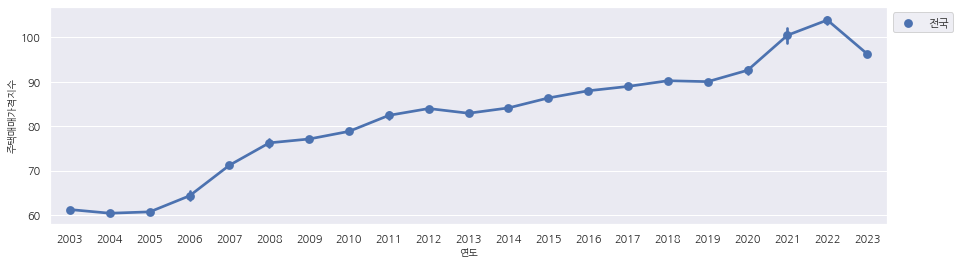

In [18]:
# 그래프 사이즈 변경하기 (가로, 세로)
plt.figure(figsize=(15, 4))

#  hue 인수에 카테고리 변수 이름을 지정하면, 카테고리 값에 따라 색상 변경
sns.pointplot(data=df_nation, x="연도", y="주택매매가격지수", hue="지역")

# 레전드 "* 전국" 위치를 고정
plt.legend(bbox_to_anchor=(1, 1))

## [2주차] 미국과 한국 주택가격지수_merge, dropna, pd.to_datetime, astype(np.float64)

In [19]:
from datetime import datetime, timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute

In [20]:
# House_Price_Index_US
import pandas as pd
df_us = pd.read_csv('data/USSTHPI_2024.csv')
df_us

,DATE,USSTHPI
0,1975-01-01,60.06
1,1975-04-01,61.01
2,1975-07-01,61.18
3,1975-10-01,62.24
4,1976-01-01,62.87
...,...,...
190,2022-07-01,627.42
191,2022-10-01,622.78
192,2023-01-01,625.78
193,2023-04-01,645.38


In [21]:
df_us['DATE']= pd.to_datetime(df_us['DATE'])

<Axes: xlabel='DATE'>

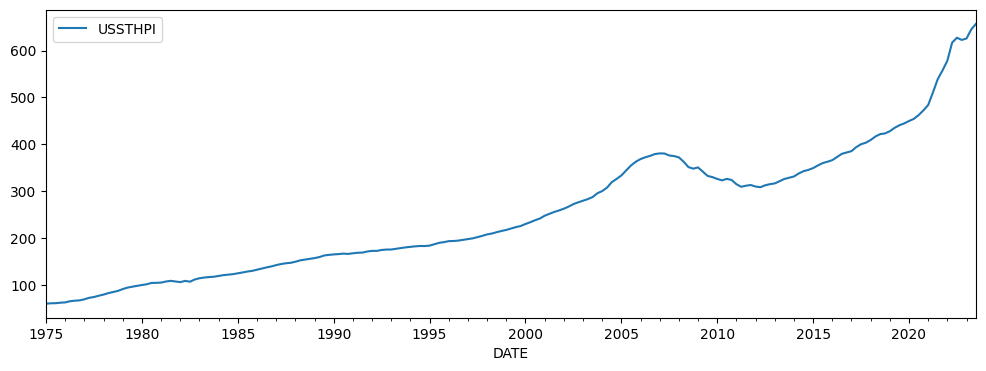

In [22]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('figure', figsize=(12, 4))
df_us.plot('DATE', 'USSTHPI')

In [23]:
# 대한민국 공동주택 통합 매매 실거래 가격지수

In [24]:
df_kr = pd.read_csv('./data/공동주택_통합_매매_실거래가격지수_20240121194411.csv', encoding='cp949')
df_kr

,시점,전국
0,시점,지수 (2017.11 = 100.0)
1,2006.01,58.2
2,2006.02,58.6
3,2006.03,59.3
4,2006.04,59.7
...,...,...
211,2023.07,121.6
212,2023.08,122.3
213,2023.09,123.0
214,2023.10,122.7


In [25]:
# 1번째 행부터 끝행 까지 데이터를 추출
df_kr = df_kr[1::]

In [28]:
# 문자열인 시점 데이터 시리즈를 datetime으로 변환
pd.to_datetime(df_kr['시점'], format='ISO8601')

1     2006-01-01
2     2006-02-01
3     2006-03-01
4     2006-04-01
5     2006-05-01
         ...    
211   2023-07-01
212   2023-08-01
213   2023-09-01
214   2023-10-01
215   2023-11-01
Name: 시점, Length: 215, dtype: datetime64[ns]

In [29]:
import warnings
warnings.filterwarnings("ignore")

df_us['Time'] = pd.to_datetime(df_us['DATE'])
df_kr['Time'] = pd.to_datetime(df_kr['시점'])

# pd.merge_asof

In [30]:
df_merged = pd.merge_asof(
    df_us.sort_values(by='Time'), df_kr.sort_values(by='Time'),
    on='Time', direction='nearest')

In [31]:
df_merged 

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,60.06,1975-01-01,2006.01,58.2
1,1975-04-01,61.01,1975-04-01,2006.01,58.2
2,1975-07-01,61.18,1975-07-01,2006.01,58.2
3,1975-10-01,62.24,1975-10-01,2006.01,58.2
4,1976-01-01,62.87,1976-01-01,2006.01,58.2
...,...,...,...,...,...
190,2022-07-01,627.42,2022-07-01,2022.07,133.8
191,2022-10-01,622.78,2022-10-01,2022.10,125.1
192,2023-01-01,625.78,2023-01-01,2023.01,116.9
193,2023-04-01,645.38,2023-04-01,2023.04,119.5


In [32]:
df_merged = pd.merge_asof(
    df_us.sort_values(by='Time'), df_kr.sort_values(by='Time'),
    on='Time', allow_exact_matches=True)

In [33]:
df_merged 

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,60.06,1975-01-01,NaN,NaN
1,1975-04-01,61.01,1975-04-01,NaN,NaN
2,1975-07-01,61.18,1975-07-01,NaN,NaN
3,1975-10-01,62.24,1975-10-01,NaN,NaN
4,1976-01-01,62.87,1976-01-01,NaN,NaN
...,...,...,...,...,...
190,2022-07-01,627.42,2022-07-01,2022.07,133.8
191,2022-10-01,622.78,2022-10-01,2022.10,125.1
192,2023-01-01,625.78,2023-01-01,2023.01,116.9
193,2023-04-01,645.38,2023-04-01,2023.04,119.5


In [34]:
df_merged.isnull().sum()

DATE         0
USSTHPI      0
Time         0
시점         124
전국         124
dtype: int64

In [35]:
df_merged.dropna(axis=0)

,DATE,USSTHPI,Time,시점,전국
124,2006-01-01,368.63,2006-01-01,2006.01,58.2
125,2006-04-01,372.41,2006-04-01,2006.04,59.7
126,2006-07-01,375.47,2006-07-01,2006.07,61.0
127,2006-10-01,379.30,2006-10-01,2006.10,66.0
128,2007-01-01,380.72,2007-01-01,2007.01,70.9
...,...,...,...,...,...
190,2022-07-01,627.42,2022-07-01,2022.07,133.8
191,2022-10-01,622.78,2022-10-01,2022.10,125.1
192,2023-01-01,625.78,2023-01-01,2023.01,116.9
193,2023-04-01,645.38,2023-04-01,2023.04,119.5


In [36]:
df_merged['전국'] = df_merged['전국'].astype(np.float64)

In [37]:
df = df_merged[["Time", "USSTHPI", "전국"]]
df

,Time,USSTHPI,전국
0,1975-01-01,60.06,NaN
1,1975-04-01,61.01,NaN
2,1975-07-01,61.18,NaN
3,1975-10-01,62.24,NaN
4,1976-01-01,62.87,NaN
...,...,...,...
190,2022-07-01,627.42,133.8
191,2022-10-01,622.78,125.1
192,2023-01-01,625.78,116.9
193,2023-04-01,645.38,119.5


In [38]:
df.columns = ["Time", "US", "KR"]
df

,Time,US,KR
0,1975-01-01,60.06,NaN
1,1975-04-01,61.01,NaN
2,1975-07-01,61.18,NaN
3,1975-10-01,62.24,NaN
4,1976-01-01,62.87,NaN
...,...,...,...
190,2022-07-01,627.42,133.8
191,2022-10-01,622.78,125.1
192,2023-01-01,625.78,116.9
193,2023-04-01,645.38,119.5


In [39]:
df = df.dropna()

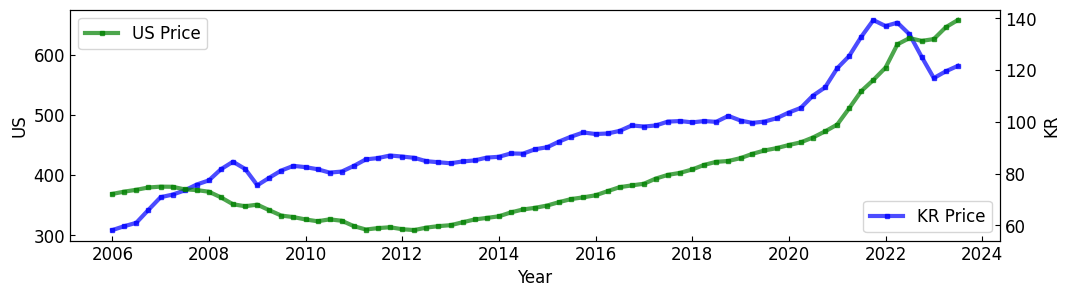

In [40]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

x = df.Time.to_numpy()
y1 = df.US.to_numpy()
y2 = df.KR.to_numpy()

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='US Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('US')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')
ax2.set_ylabel('KR')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

In [41]:
# 시점의 통일 배웠었죠?

In [42]:
base_point_KR = df_merged['전국'][df_merged['DATE']=='2017-07-01']
base_point_US = np.float32(df_merged['USSTHPI'][df_merged['DATE']=='2017-07-01'])

df_merged['USSTHP(2017.7=100)'] = df_merged['USSTHPI'] / base_point_US * 100
df_merged.dropna(inplace=True)

In [43]:
df_merged

,DATE,USSTHPI,Time,시점,전국,USSTHP(2017.7=100)
124,2006-01-01,368.63,2006-01-01,2006.01,58.2,92.102241
125,2006-04-01,372.41,2006-04-01,2006.04,59.7,93.046674
126,2006-07-01,375.47,2006-07-01,2006.07,61.0,93.811216
127,2006-10-01,379.30,2006-10-01,2006.10,66.0,94.768141
128,2007-01-01,380.72,2007-01-01,2007.01,70.9,95.122929
...,...,...,...,...,...,...
190,2022-07-01,627.42,2022-07-01,2022.07,133.8,156.760947
191,2022-10-01,622.78,2022-10-01,2022.10,125.1,155.601643
192,2023-01-01,625.78,2023-01-01,2023.01,116.9,156.351193
193,2023-04-01,645.38,2023-04-01,2023.04,119.5,161.248255


In [44]:
df_new = df_merged[["Time", "USSTHP(2017.7=100)", "전국"]]
df_new.columns = ["Time", "US", "KR"]

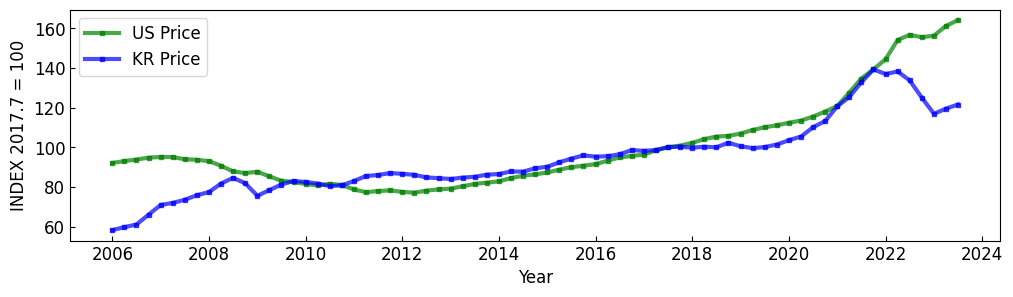

In [45]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df_new.Time.to_numpy()
y1 = df_new.US.to_numpy()
y2 = df_new.KR.to_numpy()

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(x, y1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='US Price')

# y2 : 한국 인덱스에 대한 값
ax1.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')

ax1.set_xlabel('Year')
ax1.set_ylabel('INDEX 2017.7 = 100')
ax1.tick_params(axis='both', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend(loc='upper left')

plt.show()

In [46]:
# 상관관계에 대해서 배웠습니다.

*  <span style="color:royalblue">피어슨</span>  <br>
  - 연속형 변수의 상관관계 측정<br>
  - 모수 검정(parametric test)<br><br>
  
*  <span style="color:royalblue">캔달</span>  <br>
  - 변수값 대신 순위로 바꿔 이용(내신등급, 학점)
  - 비모수 검정(Non-parametric test)
  - sample size가 작을때. 데이터 중 같은 값이 많을때 사용<br><br>  
    
*  <span style="color:royalblue">스피어만</span>  <br>
  - 켄달과 동일한 순위기준 상관계수
  - 비모수 검정(Non-parametric test)
  - 데이터 내 편차와 이상치에 민감. 켄달보다 높은 상관관계 수치를 보임<br><br>

In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 124 to 194
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    71 non-null     datetime64[ns]
 1   US      71 non-null     float64       
 2   KR      71 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.2 KB


In [48]:
df_new.index = df_new["Time"]

In [49]:
df_new = df_new[["US", "KR"]]

In [50]:
df_new

,US,KR
Time,,
2006-01-01,92.102241,58.2
2006-04-01,93.046674,59.7
2006-07-01,93.811216,61.0
2006-10-01,94.768141,66.0
2007-01-01,95.122929,70.9
...,...,...
2022-07-01,156.760947,133.8
2022-10-01,155.601643,125.1
2023-01-01,156.351193,116.9


In [51]:
df_new.corr(method='pearson', min_periods=1)

,US,KR
US,1.000000,0.824017
KR,0.824017,1.000000


## [3주차] FRED, 한국은행, 공공데이터포털_API, 최신 package/module

In [52]:
# !pip install finance-datareader

In [53]:
# M2 통화량과, 나스닥, 주택가격지수
import FinanceDataReader as fdr
import matplotlib as plt

US_all_index = fdr.DataReader('FRED:CSUSHPISA, WM2NS, USSTHPI,DFF, CORESTICKM159SFRBATL, ICSA, HSN1F, NASDAQCOM,GDP', '2010') # According to New API
US_all_index

,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
DATE,,,,,,,,,
2010-01-01,0.05,NaN,147.396,1.177002,345.0,326.18,14764.610,NaN,NaN
2010-01-02,0.05,NaN,147.396,1.177002,345.0,326.18,14764.610,NaN,456000.0
2010-01-03,0.05,NaN,147.396,1.177002,345.0,326.18,14764.610,NaN,456000.0
2010-01-04,0.12,2308.42,147.396,1.177002,345.0,326.18,14764.610,8534.2,456000.0
2010-01-05,0.12,2308.71,147.396,1.177002,345.0,326.18,14764.610,8534.2,456000.0
...,...,...,...,...,...,...,...,...,...
2024-01-21,5.33,15310.97,313.276,4.584186,664.0,657.32,27938.831,20959.2,214000.0
2024-01-22,5.33,15360.29,313.276,4.584186,664.0,657.32,27938.831,20959.2,214000.0
2024-01-23,5.33,15425.94,313.276,4.584186,664.0,657.32,27938.831,20959.2,214000.0


## [4주차] 부동산의 수요(매매가, 전세가) 와 공급(분양, 인허가 등) _def/return, read_excel, xlwings

In [60]:
from pandas import json_normalize
import requests
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mticker
plt.rc('font', family='NanumGothic')

# url 생성
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=13103871090T1+&objL1=ALL&objL2=13102871090B.0001+&objL3=13102871090C.0001+&objL4=13102871090D.0001+&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=200701&endPrdDe=202312&orgId=116&tblId=DT_MLTM_1948'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data =contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

In [61]:
df

,TBL_NM,ITM_NM_ENG,ITM_ID,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,C2_OBJ_NM,C3_OBJ_NM,C4,C4_OBJ_NM,...,C3_OBJ_NM_ENG,DT,C3,C4_OBJ_NM_ENG,PRD_SE,C1,C1_NM,C2_NM,C3_NM,C4_NM
0,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,12038,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
1,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,29789,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
2,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,49827,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
3,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,69013,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
4,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,99606,13102871090C.0001,Small Classification,M,13102871090A.0001,전국,합계(동수기준),합계(동수기준),합계(동수기준)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,301,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4396,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,323,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4397,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,330,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)
4398,주택유형별 주택건설 인허가실적(월별 누계),Construction permits,13103871090T1,116,Apartment Unit,시도명,대분류,중분류,13102871090D.0001,소분류,...,Middle Classification,336,13102871090C.0001,Small Classification,M,13102871090A.0022,세종,합계(동수기준),합계(동수기준),합계(동수기준)


In [62]:
# 데이터정제 
df = df[['PRD_DE', 'C1_NM', 'DT']]
df = df.pivot(index='PRD_DE', columns='C1_NM', values='DT')
df= df[['전국', '수도권', '지방소계']]

In [63]:
df

C1_NM,전국,수도권,지방소계
PRD_DE,,,
200701,12038,4246,7792
200702,29789,8026,21763
200703,49827,14032,35795
200704,69013,23319,45694
200705,99606,38564,61042
...,...,...,...
202307,207278,78889,128389
202308,212757,81551,131206
202309,255871,102095,153776


In [64]:
df = df.copy()
df['수도권'] = pd.to_numeric(df['수도권'])
df['지방소계'] = pd.to_numeric(df['지방소계'])

df['수도권_월'] = np.where(df.index.str[-2:] == '01', df['수도권'], df['수도권'].diff()).astype(int)
df['지방권_월'] = np.where(df.index.str[-2:] == '01', df['지방소계'], df['지방소계'].diff()).astype(int)

df['연'] = df.index.str[:4]
df['월'] = df.index.str[-2:]

df.index = df['연'] + "-" + df['월']
df.index = pd.to_datetime(df.index)
df_per = df[['수도권_월','지방권_월']]
year_per = df_per.groupby(df_per.index.year).sum()

In [65]:
year_per

C1_NM,수도권_월,지방권_월
2007,302551,253241
2008,197580,173705
2009,255158,126629
2010,250218,136324
2011,272156,277438
2012,269290,317594
2013,192610,247506
2014,241889,273362
2015,408773,356555
2016,341162,384886


In [66]:
def presale_preprocessing(url):

    contents = requests.get(url)
    test_data =contents.json()
    df = pd.json_normalize(test_data)

    df = df[['PRD_DE', 'C1_NM', 'DT']]
    df = df.pivot(index='PRD_DE', columns='C1_NM', values='DT')
    df = df.astype(int)

    df['지방권'] = df['전국'] - df['수도권']
    df = df.loc[:,['수도권', '지방권']]
    df.drop(['201510', '201511', '201512'], inplace=True)

    df['연'] = df.index.str[:4]
    df['월'] = df.index.str[-2:]    
    df['시점']= df['연'] + "-" + df['월']

    df.index = df['시점']
    df['시점'] = pd.to_datetime(df['시점'])    
    df = df.groupby(['연']).sum(['수도권','지방권'])
    
    return df

url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=T1+&objL1=00+04+11+20+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201510&endPrdDe=202312&orgId=414&tblId=DT_41401N_007'

df_presale = presale_preprocessing(url)
df_presale

C1_NM,수도권,지방권
연,,
2016,145331,168269
2017,82603,99047
2018,78454,79030
2019,86097,86562
2020,112992,113094
2021,78848,139669
2022,71886,107587
2023,52307,54095


In [71]:
def presale_graph(df_presale):
    
    down =  df_presale.iloc[:,0] #수도권
    top =  df_presale.iloc[:,1] #지방권

    plt.bar(df_presale.index, down, color='firebrick')#수도권
    plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권
    
    y = down + top
    
    plt.ylim(0, y.max()*1.1)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f : 0.001
    # gca() : get current axis 현재 Axes 객체를 반환

    plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

    plt.legend(['수도권', '지방권'])
    plt.title('전국 분양 물량(2016 ~ 2023)', fontsize='20', pad=15)
    plt.figure(figsize=(20,5))
    
    return plt.show()

In [72]:
# 1. 파일경로 설정
url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=T1+&objL1=00+04+11+20+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201510&endPrdDe=202312&orgId=414&tblId=DT_41401N_007'

#2. 데이터 전처리 함수
data = presale_preprocessing(url)

In [73]:
data

C1_NM,수도권,지방권
연,,
2016,145331,168269
2017,82603,99047
2018,78454,79030
2019,86097,86562
2020,112992,113094
2021,78848,139669
2022,71886,107587
2023,52307,54095


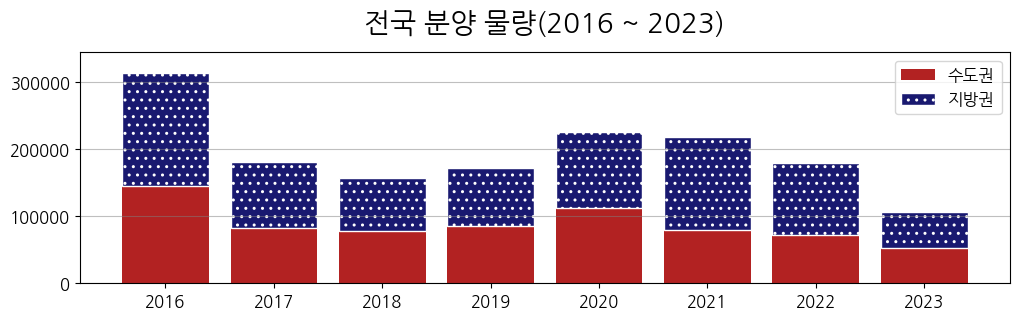

<Figure size 2000x500 with 0 Axes>

In [74]:
#3. 데이터 시각화 함수
presale_graph(data)

# 4, 5주차 KB 국민은행

In [75]:
import xlwings as xw

In [76]:
def KB_preprocessing(path, sheet_name):
    # path : KB 데이터 엑셀 파일의 저장경로
    # sheet_name : ‘매매종합’, ‘2.매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘6.전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    app = xw.App(visible=False) # 1. App
    wb = app.books.open(path)    # 2. book
    sheet = wb.sheets[sheet_name] # 3. Sheet  
    
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  # 4. Range 459번째 행
    data_range = 'A2:GE' + str(row_num-5) # A2:GE451`
    
    df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value #시트의 범위에 해당하는 데이터 를 데이터 프레임저장
    
    #23개 만 아래 순으로 하드코딩
    statesname_list = ['서울특별시', '대구광역시', '부산광역시', '대전광역시', '광주광역시', '인천광역시', '울산광역시', '세종특별시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도','구분', '전국']
    
    states_col = list(df.columns) # 칼럼명 # 187개 값.(None 포함) 전국, 서울, 강북, 강남 등...
    small_col = list(df.iloc[0]) # 칼럼명 아래 인덱스값 187개 값(None 포함) (0, 강북구), (1, 광진구)..., 노원구 등

    for num, district_data in enumerate(small_col):
        if district_data == None: # 아래 인덱스 값이 없으면 위의 인덱스값 준용. 예를 들어 서울 전체는 아래 small_col 값이 None 이므로
            small_col[num] = states_col[num] # None 값에 "서울"을 입력

        check = num # 확인 필요칼럼 수
        while True:
            if states_col[check] in statesname_list: # 위 23개 하드코딩 리스트에 포함되면
                states_col[num] = states_col[check] # 위의 인덱스 값으로 입력 small_col 값 입력
                break
            else:
                check = check - 1 
                
# 칼럼 값 안맞는 부분 하드코딩                
    small_col[3] = '강북' #경기도 광주. 광주>경기
    states_col[129] = '경기' #경기도 광주. 광주>경기
    small_col[-3] = '' #'제주/\n서귀포'
    
    df.columns = [states_col, small_col] #  ('서울',  '강북구') 와 같은 Multi index로 묶어줌.
    new_col_data = df.drop([0,1]) # 첫번째, 두번째 줄(행) 의미없는 데이터 삭제
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

# 날짜 부분을 datetime 데이터 타입으로 변경    
    for num, raw_index in enumerate(index_list):# [86, 1]
        temp = str(raw_index).split('.') #86.1 
        if int(temp[0]) > 12 : # 월만 써있는 값 (12) 보다 큰 연도값
            if len(temp[0]) == 2: # 두자리 연도 
                new_index.append('19' + temp[0] + '.' + temp[1]) #1986.1
            else: # 4자리 연도
                new_index.append(temp[0] + '.' + temp[1]) #2000.1
        else:# (분할된 첫 숫자가 12보다 작은) 월만 있는 값
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0]) #1986.2

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

In [77]:
path = r'./data/202312_월간시계열.xlsx'

price_index = KB_preprocessing(path, '2.매매APT') 
jun_index = KB_preprocessing(path, '6.전세APT')

In [78]:
# 데이터 확인

In [79]:
price_index.tail() # 매매가 지수

전국      서울특별시                                              \
                   전국      서울특별시         강북        강북구        광진구        노원구   
2023-08-01  90.011772  90.338585  88.503273  88.694978  93.415584  84.870662   
2023-09-01  90.088355  90.577885  88.564576  88.749225  93.600613  84.740392   
2023-10-01  90.171682  90.786965  88.646116  88.903279  93.959341  84.733587   
2023-11-01  90.177104  90.821491  88.599421   88.92639  94.118278  84.429406   
2023-12-01  90.080022  90.725487  88.469239  88.656086  94.128591  84.198454   

                                                        ...       경상남도  \
                  도봉구       동대문구        마포구       서대문구  ...        의창구   
2023-08-01  83.820584   87.18984    92.4772   88.22126  ...  95.327992   
2023-09-01  83.663751  87.292883  92.903408  88.331496  ...    95.2732   
2023-10-01  83.619899  87.490738  93.130133  88.513018  ...  95.562286   
2023-11-01  83.374611  87.392763  93.192953  88.857047  ...  96.123496   
2023-12-01  82.965241  87.165582  93.182801  89.056212  ...  96.068768   

                                                                     \
                   진해구         양산         거제         진주시        김해시   
2023-08-01  100.230934   95.99924  92.379759    99.84977  92.449175   
2023-09-01  100.010617  95.757151  92.157878  100.149896  92.234408   
2023-10-01    99.80501  95.685886  91.991377  100.522123  92.018765   
2023-11-01   99.587745  95.430645  91.895691  100.684919  91.853314   
2023-12-01   99.495978   95.10813  91.131709  100.874384  91.707797   

                                제주특별자치도             
                   통영시          제주특별자치도       기타지방  
2023-08-01  100.153165  None   99.15744  96.489872  
2023-09-01  100.125139  None  99.119475  96.476374  
2023-10-01   100.09349  None  99.147254  96.505826  
2023-11-01   100.00747  None  98.951861  96.501643  
2023-12-01   99.952562  None   98.78602  96.413047  

[5 rows x 186 columns]

In [80]:
jun_index.tail() # 전세가 지수

전국      서울특별시                                              \
                   전국      서울특별시         강북        강북구        광진구        노원구   
2023-08-01  87.605309  84.553869  85.006666  85.055986  84.367155  85.274652   
2023-09-01  87.777954   84.91176  85.138831  85.502122   85.03286  85.207804   
2023-10-01  88.031956  85.442287  85.487651  85.872395  85.854596  85.268996   
2023-11-01  88.275588  85.975609  85.882139  86.186301  86.240061  85.381688   
2023-12-01  88.409032  86.378188  86.184508  86.740395  86.656806  85.318753   

                                                        ...       경상남도  \
                  도봉구       동대문구        마포구       서대문구  ...        의창구   
2023-08-01  84.774604   82.67992  85.754971  87.946201  ...  93.413123   
2023-09-01  84.395976  82.777667  86.410353  88.107057  ...  93.579369   
2023-10-01  84.813873  82.998534  87.243813  88.523355  ...  94.104846   
2023-11-01  85.166569  83.194681  88.064044  89.419232  ...    94.6072   
2023-12-01  85.126368   83.51693  88.813102  90.103455  ...  94.664258   

                                                                     \
                   진해구         양산         거제         진주시        김해시   
2023-08-01  104.107782  90.785724  94.518483   98.677392  91.600803   
2023-09-01  103.915641  90.247976  94.086682   99.106868  91.238022   
2023-10-01  103.665927  90.120674   93.44984   99.712433  90.633367   
2023-11-01  103.569398  90.085452  93.294129  100.075114  90.455264   
2023-12-01  104.031288  89.704975  93.063607  100.699324  90.303195   

                                제주특별자치도             
                   통영시          제주특별자치도       기타지방  
2023-08-01  101.128326  None  96.301313  96.311157  
2023-09-01  101.128326  None  96.142097  96.295514  
2023-10-01  101.128326  None  96.100524  96.353312  
2023-11-01  101.128326  None  96.095075  96.424776  
2023-12-01  101.128326  None  96.069915  96.452897  

[5 rows x 186 columns]

In [164]:
# 분석하고 싶은 지역 : 우리 동네

In [81]:
city = '서울특별시'
district = '강남구'

In [82]:
price_kr = price_index[city][district]['2010-01':]
junse_kr = jun_index[city][district]['2010-01':]
# unsold_kr = unsold[city]
# per_kr = per[city]

In [83]:
price_kr.head()

2010-01-01    60.729481
2010-02-01    60.973137
2010-03-01    61.006114
2010-04-01    60.980161
2010-05-01    60.566463
Name: 강남구, dtype: object

In [84]:
# left_index : bool    Use the index of the left DataFrame as the join key.

temp_merged = pd.merge_asof(
    price_kr, junse_kr,
    left_index=True, right_index=True, allow_exact_matches=True)
temp_merged .columns = ['강남구_매매지수', '강남구_전세지수']

In [85]:
temp_merged 

,강남구_매매지수,강남구_전세지수
2010-01-01,60.729481,49.301057
2010-02-01,60.973137,49.982587
2010-03-01,61.006114,50.244169
2010-04-01,60.980161,50.620538
2010-05-01,60.566463,50.826113
...,...,...
2023-08-01,95.993766,81.438153
2023-09-01,96.624532,81.770394
2023-10-01,97.045327,82.233577
2023-11-01,97.245942,82.808694


In [86]:
# url 생성(인허가)
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=13103871090T1+&objL1=ALL&objL2=13102871090B.0001+&objL3=13102871090C.0001+&objL4=13102871090D.0001+&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=200701&endPrdDe=202312&orgId=116&tblId=DT_MLTM_1948'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data =contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

In [87]:
df = df[['PRD_DE', 'C1_NM', 'DT']]
# df = df.pivot(index='PRD_DE', columns='C1_NM', values='DT')

In [88]:
df

,PRD_DE,C1_NM,DT
0,200701,전국,12038
1,200702,전국,29789
2,200703,전국,49827
3,200704,전국,69013
4,200705,전국,99606
...,...,...,...
4395,202307,세종,301
4396,202308,세종,323
4397,202309,세종,330
4398,202310,세종,336


In [89]:
df = df[df['C1_NM']=='서울'].reset_index(drop=True)

In [90]:
df.columns = ['시점','지역','서울_인허가물량']

In [91]:
df['서울_인허가물량'] = pd.to_numeric(df['서울_인허가물량'])
df['서울_인허가물량'] = np.where(df['시점'].str[-2:] == '01', df['서울_인허가물량'], df['서울_인허가물량'].diff()).astype(int)

# df = df.copy()
df['연'] = df['시점'].astype(str).str[:4]
df['월'] = df['시점'].astype(str).str[-2:]


df.index = df['연'] + "-" + df['월']
df.index = pd.to_datetime(df.index)

In [92]:
per_kr = df

In [93]:
per_kr

,시점,지역,서울_인허가물량,연,월
2007-01-01,200701,서울,1530,2007,01
2007-02-01,200702,서울,794,2007,02
2007-03-01,200703,서울,1888,2007,03
2007-04-01,200704,서울,1963,2007,04
2007-05-01,200705,서울,1866,2007,05
...,...,...,...,...,...
2023-07-01,202307,서울,947,2023,07
2023-08-01,202308,서울,834,2023,08
2023-09-01,202309,서울,408,2023,09
2023-10-01,202310,서울,2071,2023,10


In [94]:
temp_merged

,강남구_매매지수,강남구_전세지수
2010-01-01,60.729481,49.301057
2010-02-01,60.973137,49.982587
2010-03-01,61.006114,50.244169
2010-04-01,60.980161,50.620538
2010-05-01,60.566463,50.826113
...,...,...
2023-08-01,95.993766,81.438153
2023-09-01,96.624532,81.770394
2023-10-01,97.045327,82.233577
2023-11-01,97.245942,82.808694


In [95]:
temp_merged = pd.merge_asof(
    temp_merged, per_kr,
    left_index=True, right_index=True, allow_exact_matches=True)

In [96]:
temp_merged = temp_merged[['강남구_매매지수', '강남구_전세지수', '서울_인허가물량']]

In [97]:
temp_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량
2010-01-01,60.729481,49.301057,1273
2010-02-01,60.973137,49.982587,1236
2010-03-01,61.006114,50.244169,4699
2010-04-01,60.980161,50.620538,2945
2010-05-01,60.566463,50.826113,2417
...,...,...,...
2023-08-01,95.993766,81.438153,834
2023-09-01,96.624532,81.770394,408
2023-10-01,97.045327,82.233577,2071
2023-11-01,97.245942,82.808694,937


## [4주차] 분양물량

In [99]:
# url 생성(분양)
json_Url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTExZTY3N2QyOWYxZjI2NDY5YzFmMjNhOWRiNjgxNzY=&itmId=13103133605T2+&objL1=13102133605A.0001+13102133605A.0002+13102133605A.0003+&objL2=ALL&objL3=ALL&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201301&endPrdDe=202312&orgId=116&tblId=DT_MLTM_5557'

# 데이터 요청
contents = requests.get(json_Url)

# JSON데이터 가져오기
test_data =contents.json()

# Pandas DataFrame 변환
df = pd.json_normalize(test_data)

# 출력
df

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_ID,UNIT_NM,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,C2_OBJ_NM,C3_OBJ_NM,DT,C3,PRD_SE,C2,C1,C1_NM,C2_NM,C3_NM
0,주택건설 분양실적(공동주택),201301,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,2770,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계
1,주택건설 분양실적(공동주택),201302,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,12818,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계
2,주택건설 분양실적(공동주택),201303,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,14965,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계
3,주택건설 분양실적(공동주택),201304,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,9983,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계
4,주택건설 분양실적(공동주택),201305,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,18701,13102133605C.0001,M,13102133605B.0001,13102133605A.0001,합계,합계,순계
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,주택건설 분양실적(공동주택),202307,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,727,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계
5236,주택건설 분양실적(공동주택),202308,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,931,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계
5237,주택건설 분양실적(공동주택),202309,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,1134,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계
5238,주택건설 분양실적(공동주택),202310,DT_MLTM_5557,분양,13103133605T2,호,116,Apartment Unit,구분1,구분2,레벨01,1134,13102133605C.0002,M,13102133605B.0019,13102133605A.0003,지방,제주,누계


In [100]:
df1 = df[['PRD_DE', 'C1_NM', 'C2_NM', 'C3_NM','DT']]

In [101]:
df1

,PRD_DE,C1_NM,C2_NM,C3_NM,DT
0,201301,합계,합계,순계,2770
1,201302,합계,합계,순계,12818
2,201303,합계,합계,순계,14965
3,201304,합계,합계,순계,9983
4,201305,합계,합계,순계,18701
...,...,...,...,...,...
5235,202307,지방,제주,누계,727
5236,202308,지방,제주,누계,931
5237,202309,지방,제주,누계,1134
5238,202310,지방,제주,누계,1134


In [102]:
df['C2_NM'].unique()

array(['합계', '소계', '서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종',
       '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [103]:
(df1['C2_NM']=='서울') & (df1['C3_NM']=='순계')

0       False
1       False
2       False
3       False
4       False
        ...  
5235    False
5236    False
5237    False
5238    False
5239    False
Length: 5240, dtype: bool

In [104]:
df1 = df1[(df1['C2_NM']=='서울') & (df1['C3_NM']=='순계')].reset_index(drop=True)

In [105]:
df1

,PRD_DE,C1_NM,C2_NM,C3_NM,DT
0,201301,수도권,서울,순계,202
1,201302,수도권,서울,순계,63
2,201303,수도권,서울,순계,252
3,201304,수도권,서울,순계,560
4,201305,수도권,서울,순계,432
...,...,...,...,...,...
126,202307,수도권,서울,순계,753
127,202308,수도권,서울,순계,2111
128,202309,수도권,서울,순계,373
129,202310,수도권,서울,순계,2105


In [106]:
df1.columns = ['시점','지역','시군구','합계구분','서울_분양물량']
df1['서울_분양물량'] = pd.to_numeric(df1['서울_분양물량'])
# df1['서울_분양물량'] = np.where(df1['시점'].str[-2:] == '01', df1['서울_분양물량'], df1['서울_분양물량'].diff()).astype(int)

# df1 = df1.copy()
df1['연'] = df1['시점'].astype(str).str[:4]
df1['월'] = df1['시점'].astype(str).str[-2:]


df1.index = df1['연'] + "-" + df1['월']
df1.index = pd.to_datetime(df1.index)

In [107]:
df1

,시점,지역,시군구,합계구분,서울_분양물량,연,월
2013-01-01,201301,수도권,서울,순계,202,2013,01
2013-02-01,201302,수도권,서울,순계,63,2013,02
2013-03-01,201303,수도권,서울,순계,252,2013,03
2013-04-01,201304,수도권,서울,순계,560,2013,04
2013-05-01,201305,수도권,서울,순계,432,2013,05
...,...,...,...,...,...,...,...
2023-07-01,202307,수도권,서울,순계,753,2023,07
2023-08-01,202308,수도권,서울,순계,2111,2023,08
2023-09-01,202309,수도권,서울,순계,373,2023,09
2023-10-01,202310,수도권,서울,순계,2105,2023,10


In [108]:
df1 = df1[['서울_분양물량']]

In [109]:
df1.index = pd.to_datetime(df1.index)
df_presale = df1

In [110]:
df_presale

,서울_분양물량
2013-01-01,202
2013-02-01,63
2013-03-01,252
2013-04-01,560
2013-05-01,432
...,...
2023-07-01,753
2023-08-01,2111
2023-09-01,373
2023-10-01,2105


In [111]:
temp_merged.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=168, freq=None)

In [112]:
df_presale.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01'],
              dtype='datetime64[ns]', length=131, freq=None)

In [113]:
temp_merged = pd.merge_asof(
    temp_merged, df_presale,
    left_index=True, right_index=True, allow_exact_matches=True)

In [114]:
temp_merged.columns = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량']
temp_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량
2010-01-01,60.729481,49.301057,1273,NaN
2010-02-01,60.973137,49.982587,1236,NaN
2010-03-01,61.006114,50.244169,4699,NaN
2010-04-01,60.980161,50.620538,2945,NaN
2010-05-01,60.566463,50.826113,2417,NaN
...,...,...,...,...
2023-08-01,95.993766,81.438153,834,2111.0
2023-09-01,96.624532,81.770394,408,373.0
2023-10-01,97.045327,82.233577,2071,2105.0
2023-11-01,97.245942,82.808694,937,531.0


In [115]:
temp_merged.isnull().sum()

강남구_매매지수     0
강남구_전세지수     0
서울_인허가물량     0
서울_분양물량     36
dtype: int64

In [116]:
temp_merged.dropna(inplace=True)

In [117]:
temp_merged

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량
2013-01-01,55.539231,61.167145,3789,202.0
2013-02-01,55.44449,61.844689,3090,63.0
2013-03-01,55.509901,62.332408,4127,252.0
2013-04-01,55.47913,62.341758,5314,560.0
2013-05-01,55.585253,62.361958,6206,432.0
...,...,...,...,...
2023-08-01,95.993766,81.438153,834,2111.0
2023-09-01,96.624532,81.770394,408,373.0
2023-10-01,97.045327,82.233577,2071,2105.0
2023-11-01,97.245942,82.808694,937,531.0


In [118]:
temp_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2013-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   강남구_매매지수  132 non-null    object 
 1   강남구_전세지수  132 non-null    object 
 2   서울_인허가물량  132 non-null    int32  
 3   서울_분양물량   132 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 4.6+ KB


In [119]:
temp_merged = temp_merged.astype('float64')

In [120]:
temp_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2013-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   강남구_매매지수  132 non-null    float64
 1   강남구_전세지수  132 non-null    float64
 2   서울_인허가물량  132 non-null    float64
 3   서울_분양물량   132 non-null    float64
dtypes: float64(4)
memory usage: 5.2 KB


In [121]:
US_all_index

,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
DATE,,,,,,,,,
2010-01-01,0.05,NaN,147.396,1.177002,345.0,326.18,14764.610,NaN,NaN
2010-01-02,0.05,NaN,147.396,1.177002,345.0,326.18,14764.610,NaN,456000.0
2010-01-03,0.05,NaN,147.396,1.177002,345.0,326.18,14764.610,NaN,456000.0
2010-01-04,0.12,2308.42,147.396,1.177002,345.0,326.18,14764.610,8534.2,456000.0
2010-01-05,0.12,2308.71,147.396,1.177002,345.0,326.18,14764.610,8534.2,456000.0
...,...,...,...,...,...,...,...,...,...
2024-01-21,5.33,15310.97,313.276,4.584186,664.0,657.32,27938.831,20959.2,214000.0
2024-01-22,5.33,15360.29,313.276,4.584186,664.0,657.32,27938.831,20959.2,214000.0
2024-01-23,5.33,15425.94,313.276,4.584186,664.0,657.32,27938.831,20959.2,214000.0


In [122]:
US_all_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5138 entries, 2010-01-01 to 2024-01-25
Freq: D
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DFF                   5138 non-null   float64
 1   NASDAQCOM             5135 non-null   float64
 2   CSUSHPISA             5138 non-null   float64
 3   CORESTICKM159SFRBATL  5138 non-null   float64
 4   HSN1F                 5138 non-null   float64
 5   USSTHPI               5138 non-null   float64
 6   GDP                   5138 non-null   float64
 7   WM2NS                 5135 non-null   float64
 8   ICSA                  5137 non-null   float64
dtypes: float64(9)
memory usage: 401.4 KB


In [123]:
df_merged = pd.merge_asof(
    temp_merged, US_all_index,
    left_index=True, right_index=True, allow_exact_matches=True)
df_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0


In [124]:
# df_merged.dropna(inplace=True)
# df_merged

In [125]:
# df_merged = df_merged.drop(columns=['수도권_분양물량','SP500']).fillna(method='backfill')
# df_merged

## [4주차] Target Y 강남구 매매가 데이터 수집 
분양예측_데이터 전처리(pickle), 모델링(Regression, LSTM)

In [158]:
def KB_gangnam_price(path, sheet_name):
    
    app = xw.App(visible=False) # 1. App
    wb = app.books.open(path)    # 2. book
    sheet = wb.sheets[sheet_name] # 3. Sheet  
    
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  # 4. Range
    data_range = 'A2:BM' + str(row_num)
    
    df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    df_gangnam = df.iloc[2:,[0,14]].reset_index(drop=True)
    df_gangnam.dropna(axis=0, inplace=True)    
    df_gangnam[None].astype(int)
    
    index_list = list(df_gangnam['규모']) #날짜
    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if "'" in temp[0] :
            new_index.append('20' + temp[0][1:] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])
    
    df_gangnam.index= pd.to_datetime(new_index)
    df_gangnam[None] = df_gangnam[None].astype(int)
    del df_gangnam['규모']
    df_gangnam.columns = ['gangnam_price(만원)']
    
    return df_gangnam

In [159]:
path = r'./data/202312_월간시계열.xlsx'
df_gangnam = KB_gangnam_price(path, '41.평균매매') 

*이하 교육용 line by line

In [160]:
df_gangnam

,gangnam_price(만원)
2008-12-01,62363
2009-01-01,61497
2009-02-01,61630
2009-03-01,61520
2009-04-01,61930
...,...
2023-08-01,142613
2023-09-01,143692
2023-10-01,144485
2023-11-01,144875


---

In [128]:
path = './data/202312_월간시계열.xlsx'
sheet_name = '41.평균매매'

In [129]:
path

'./data/202312_월간시계열.xlsx'

In [130]:
sheet_name

'41.평균매매'

In [131]:
app = xw.App(visible=False) # 1. App
wb = app.books.open(path)    # 2. book
sheet = wb.sheets[sheet_name] # 3. Sheet  

In [132]:
row_num = sheet.range(1,1).end('down').end('down').end('down').row  # 4. Range
data_range = 'A2:BM' + str(row_num)

In [133]:
row_num

190

In [134]:
df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
df

,규모,전국 Total,None,None,None,서울특별시 Seoul,None,None,None,강북14개구 Northern seoul,...,전라남도 Jeonnam,None,경상북도 Gyungbuk,None,경상남도 Gyungnam,None,기타지방 Non Metropolitan Area,None,None,None
0,None,종합,아파트,단독,연립,종합,아파트,단독,연립,종합,...,종합,아파트,종합,아파트,종합,아파트,종합,아파트,단독,연립
1,년도,Total,Apartments,Detached houses,Row Houses,Total,Apartments,Detached houses,Row Houses,Total,...,Total,Apartments,Total,Apartments,Total,Apartments,Total,Apartments,Detached houses,Row Houses
2,'08.12,24209.343341,25060.733658,26987.80417,14629.383143,45986.177653,52529.555997,56296.005569,23275.561643,37453.720926,...,-,-,-,-,-,-,10796.468928,10234.568332,12361.302861,5368.987586
3,'09.1,24015.559276,24803.524004,26919.866476,14529.214367,45588.465308,51924.635389,56176.137783,23111.327192,37255.837945,...,-,-,-,-,-,-,10763.215943,10205.19263,12323.800625,5351.977568
4,2.0,23962.799429,24722.389691,26939.632365,14487.22694,45593.126725,51905.434317,56298.185807,23074.248737,37191.745222,...,-,-,-,-,-,-,10739.04542,10178.852202,12313.970337,5306.839653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,8.0,44293.652778,49643.627725,45068.911008,21444.133466,89128.487287,118518.623053,109930.351336,32879.19603,73970.549113,...,17318.772867,18778.992864,18274.234891,18936.706411,23926.639013,24572.444609,22598.066344,23095.338897,24951.954092,9960.621577
184,9.0,44444.365808,49853.808402,45064.530755,21446.170858,89522.886481,119167.810298,109912.729458,32883.237443,74093.515515,...,17320.095478,18780.870631,18292.850225,18959.506591,23937.578225,24586.531009,22620.608043,23127.675124,24948.271485,9963.574689
185,10.0,44576.44612,50024.785873,45125.800139,21442.904578,89873.169213,119662.798247,110397.868667,32862.257149,74277.231565,...,17387.782941,18871.000581,18336.665028,19017.509555,23976.78942,24635.892245,22671.448897,23193.519756,24948.271485,10019.124481
186,11.0,44689.279579,50176.0128,45124.582943,21447.097549,90118.926496,120038.861365,110365.030474,32881.824884,74539.184589,...,17379.848679,18853.57246,18348.273639,19032.585723,24016.965932,24686.784669,22690.879581,23219.919769,24948.271485,10020.456432


In [135]:
df.iloc[2:20]

,규모,전국 Total,None,None,None,서울특별시 Seoul,None,None,None,강북14개구 Northern seoul,...,전라남도 Jeonnam,None,경상북도 Gyungbuk,None,경상남도 Gyungnam,None,기타지방 Non Metropolitan Area,None,None,None
2,'08.12,24209.343341,25060.733658,26987.80417,14629.383143,45986.177653,52529.555997,56296.005569,23275.561643,37453.720926,...,-,-,-,-,-,-,10796.468928,10234.568332,12361.302861,5368.987586
3,'09.1,24015.559276,24803.524004,26919.866476,14529.214367,45588.465308,51924.635389,56176.137783,23111.327192,37255.837945,...,-,-,-,-,-,-,10763.215943,10205.19263,12323.800625,5351.977568
4,2.0,23962.799429,24722.389691,26939.632365,14487.22694,45593.126725,51905.434317,56298.185807,23074.248737,37191.745222,...,-,-,-,-,-,-,10739.04542,10178.852202,12313.970337,5306.839653
5,3.0,23914.255611,24636.256944,26970.644384,14474.291626,45536.644063,51766.062233,56437.454767,23043.166539,37152.132369,...,-,-,-,-,-,-,10729.029675,10175.393413,12300.740829,5310.193942
6,4.0,23957.07885,24672.873592,27043.912487,14477.620244,45725.098322,51993.440585,56771.54414,23028.767231,37299.178183,...,-,-,-,-,-,-,10731.556477,10177.11168,12304.144871,5313.088154
7,5.0,23996.435927,24724.382248,27065.987363,14486.443344,45793.158157,52103.526034,56803.395343,23033.2843,37307.724347,...,-,-,-,-,-,-,10730.609095,10177.09262,12301.697193,5321.575425
8,6.0,24076.382932,24808.750718,27143.201393,14531.793594,46063.682403,52412.523358,57212.355107,23107.735546,37384.887212,...,-,-,-,-,-,-,10739.354493,10183.851975,12312.663915,5329.497907
9,7.0,24184.582562,24953.179477,27179.15009,14580.670804,46425.908067,52935.096455,57432.865353,23230.378915,37589.756572,...,-,-,-,-,-,-,10737.39014,10184.141038,12307.286632,5336.388751
10,8.0,24266.837719,25046.334447,27239.479274,14640.072732,46652.860994,53211.404255,57662.197206,23346.619183,37744.469881,...,-,-,-,-,-,-,10750.465762,10204.093517,12304.820706,5361.915196
11,9.0,24458.706659,25255.520755,27407.33321,14771.484136,47158.90541,53790.66825,58288.374257,23594.70346,38109.214068,...,-,-,-,-,-,-,10786.757615,10248.762463,12332.574279,5390.827816


In [136]:
df_gangnam = df.iloc[2:,[0,14]].reset_index(drop=True)

In [137]:
df_gangnam

,규모,None
0,'08.12,62363.678608
1,'09.1,61497.963057
2,2.0,61630.555507
3,3.0,61520.993798
4,4.0,61930.629342
...,...,...
181,8.0,142613.264447
182,9.0,143692.968001
183,10.0,144485.481747
184,11.0,144875.672359


In [138]:
df_gangnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   규모      186 non-null    object
 1   None    181 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [139]:
# df_gangnam.index= pd.to_datetime(df_gangnam.index)

In [145]:
df_gangnam[None].tail(20)

166      151455.7232
167             None
168             None
169             None
170             None
171             None
172    153099.326861
173    150815.708018
174    147864.808782
175    146235.256642
176    144688.948863
177    143547.231931
178    141654.400192
179    141631.513114
180    141896.465162
181    142613.264447
182    143692.968001
183    144485.481747
184    144875.672359
185    144755.629039
dtype: object

In [146]:
df_gangnam.dropna(axis=0, inplace=True)

In [147]:
df_gangnam.tail(20)

,규모,None
161,5.0,152674.422978
162,6.0,152858.405689
163,7.0,153013.908964
164,8.0,152873.143037
165,9.0,152617.229778
166,10.0,151455.7232
172,11.0,153099.326861
173,12.0,150815.708018
174,'23.1,147864.808782
175,2.0,146235.256642


In [148]:
df_gangnam[None].astype(int)

0       62363
1       61497
2       61630
3       61520
4       61930
        ...  
181    142613
182    143692
183    144485
184    144875
185    144755
Length: 181, dtype: int32

## 연습문제(Exercise) String으로 된 날짜 파싱하기

In [149]:
index_list = list(df_gangnam['규모'])
index_list

["'08.12",
 "'09.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'10.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'11.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'12.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'13.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'14.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'15.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'16.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'17.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'18.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'19.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'20.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 "'21.1",
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 

In [150]:
for num, raw_index in enumerate(index_list):
    print(num, raw_index)

0 '08.12
1 '09.1
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
7 7.0
8 8.0
9 9.0
10 10.0
11 11.0
12 12.0
13 '10.1
14 2.0
15 3.0
16 4.0
17 5.0
18 6.0
19 7.0
20 8.0
21 9.0
22 10.0
23 11.0
24 12.0
25 '11.1
26 2.0
27 3.0
28 4.0
29 5.0
30 6.0
31 7.0
32 8.0
33 9.0
34 10.0
35 11.0
36 12.0
37 '12.1
38 2.0
39 3.0
40 4.0
41 5.0
42 6.0
43 7.0
44 8.0
45 9.0
46 10.0
47 11.0
48 12.0
49 '13.1
50 2.0
51 3.0
52 4.0
53 5.0
54 6.0
55 7.0
56 8.0
57 9.0
58 10.0
59 11.0
60 12.0
61 '14.1
62 2.0
63 3.0
64 4.0
65 5.0
66 6.0
67 7.0
68 8.0
69 9.0
70 10.0
71 11.0
72 12.0
73 '15.1
74 2.0
75 3.0
76 4.0
77 5.0
78 6.0
79 7.0
80 8.0
81 9.0
82 10.0
83 11.0
84 12.0
85 '16.1
86 2.0
87 3.0
88 4.0
89 5.0
90 6.0
91 7.0
92 8.0
93 9.0
94 10.0
95 11.0
96 12.0
97 '17.1
98 2.0
99 3.0
100 4.0
101 5.0
102 6.0
103 7.0
104 8.0
105 9.0
106 10.0
107 11.0
108 12.0
109 '18.1
110 2.0
111 3.0
112 4.0
113 5.0
114 6.0
115 7.0
116 8.0
117 9.0
118 10.0
119 11.0
120 12.0
121 '19.1
122 2.0
123 3.0
124 4.0
125 5.0
126 6.0
127 7.0
128 8.0
129 9.0
130 10.0
131 11

In [151]:
new_index = []

for num, raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')
    if "'" in temp[0] :
        new_index.append('20' + temp[0][1:] + '.' + temp[1])
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

In [152]:
new_index

['2008.12',
 '2009.1',
 '2009.2',
 '2009.3',
 '2009.4',
 '2009.5',
 '2009.6',
 '2009.7',
 '2009.8',
 '2009.9',
 '2009.10',
 '2009.11',
 '2009.12',
 '2010.1',
 '2010.2',
 '2010.3',
 '2010.4',
 '2010.5',
 '2010.6',
 '2010.7',
 '2010.8',
 '2010.9',
 '2010.10',
 '2010.11',
 '2010.12',
 '2011.1',
 '2011.2',
 '2011.3',
 '2011.4',
 '2011.5',
 '2011.6',
 '2011.7',
 '2011.8',
 '2011.9',
 '2011.10',
 '2011.11',
 '2011.12',
 '2012.1',
 '2012.2',
 '2012.3',
 '2012.4',
 '2012.5',
 '2012.6',
 '2012.7',
 '2012.8',
 '2012.9',
 '2012.10',
 '2012.11',
 '2012.12',
 '2013.1',
 '2013.2',
 '2013.3',
 '2013.4',
 '2013.5',
 '2013.6',
 '2013.7',
 '2013.8',
 '2013.9',
 '2013.10',
 '2013.11',
 '2013.12',
 '2014.1',
 '2014.2',
 '2014.3',
 '2014.4',
 '2014.5',
 '2014.6',
 '2014.7',
 '2014.8',
 '2014.9',
 '2014.10',
 '2014.11',
 '2014.12',
 '2015.1',
 '2015.2',
 '2015.3',
 '2015.4',
 '2015.5',
 '2015.6',
 '2015.7',
 '2015.8',
 '2015.9',
 '2015.10',
 '2015.11',
 '2015.12',
 '2016.1',
 '2016.2',
 '2016.3',
 '2016.4',

In [153]:
df_gangnam.index= pd.to_datetime(new_index)

In [154]:
df_gangnam[None] = df_gangnam[None].astype(int)

In [155]:
del df_gangnam['규모']

In [156]:
df_gangnam.columns = ['gangnam_price(만원)']

In [157]:
df_gangnam

,gangnam_price(만원)
2008-12-01,62363
2009-01-01,61497
2009-02-01,61630
2009-03-01,61520
2009-04-01,61930
...,...
2023-08-01,142613
2023-09-01,143692
2023-10-01,144485
2023-11-01,144875


---

## Target Y 값 수집완성

In [161]:
df_merged = pd.merge_asof(
    df_merged, df_gangnam,
    left_index=True, right_index=True, allow_exact_matches=True)
df_merged 

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0,59892
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0,59568
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0,59440
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0,57388
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0,57403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0,142613
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0,143692
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0,144485
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0,144875


In [162]:
df = df_merged 

In [163]:
train = df[df.index < pd.to_datetime('2019-12-31')]
test = df[df.index > pd.to_datetime('2019-12-31')]

In [164]:
df.columns

Index(['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price(만원)'],
      dtype='object')

In [165]:
feature_names = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA'] # X

target = 'gangnam_price(만원)' #y

# y = ax + b 의 형태

X_train = train[feature_names]
X_test = test[feature_names]

y_train = train[target]
y_test = test[target]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84, 13)
(84,)
(48, 13)
(48,)


In [166]:
X_train

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,76.855798,76.687059,4331.0,2002.0,2.14,8111.12,210.083,2.629246,720.0,440.74,21694.282,14789.1,200000.0
2019-09-01,77.400317,76.826387,2661.0,660.0,2.13,7962.88,210.892,2.606767,715.0,440.74,21694.282,14831.4,207000.0
2019-10-01,78.331685,77.484499,2987.0,612.0,1.88,7908.68,211.779,2.733341,721.0,444.66,21902.390,15012.9,209000.0
2019-11-01,79.045414,77.769412,4275.0,915.0,1.57,8386.40,212.770,2.768217,710.0,444.66,21902.390,15077.4,217000.0


In [167]:
y_train.to_frame()

,gangnam_price(만원)
2013-01-01,59892
2013-02-01,59568
2013-03-01,59440
2013-04-01,57388
2013-05-01,57403
...,...
2019-08-01,101111
2019-09-01,102264
2019-10-01,102662
2019-11-01,103386


In [168]:
import pickle
with open( "./data/월별부동산데이터_2023", "wb" ) as file:
    pickle.dump(df, file)

In [169]:
#####################################################################

In [170]:
with open("./data/월별부동산데이터_2023", "rb" ) as file:
    df = pickle.load(file)

In [171]:
df.shape

(132, 14)

-----------

이하 설명

In [172]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [173]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

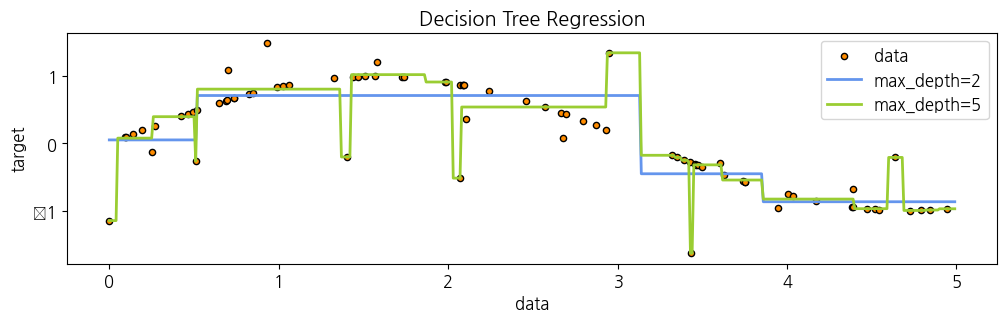

In [174]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


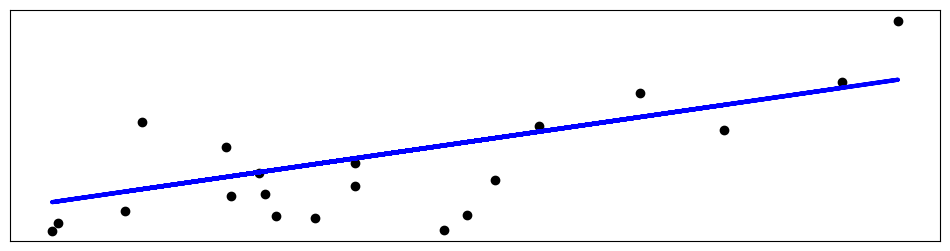

In [175]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

*Next Lecture : [5주차] 2023 머신러닝(ML), 딥러닝(DL) 문제해결 프로세스.ipynb*

In [176]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2013-01-01 to 2023-12-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   강남구_매매지수              132 non-null    float64
 1   강남구_전세지수              132 non-null    float64
 2   서울_인허가물량              132 non-null    float64
 3   서울_분양물량               132 non-null    float64
 4   DFF                   132 non-null    float64
 5   NASDAQCOM             132 non-null    float64
 6   CSUSHPISA             132 non-null    float64
 7   CORESTICKM159SFRBATL  132 non-null    float64
 8   HSN1F                 132 non-null    float64
 9   USSTHPI               132 non-null    float64
 10  GDP                   132 non-null    float64
 11  WM2NS                 132 non-null    float64
 12  ICSA                  132 non-null    float64
 13  gangnam_price(만원)     132 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 15.0 KB


In [177]:
df_merged.columns

Index(['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price(만원)'],
      dtype='object')

In [178]:
df_merged['time'] = df_merged.index

<Axes: >

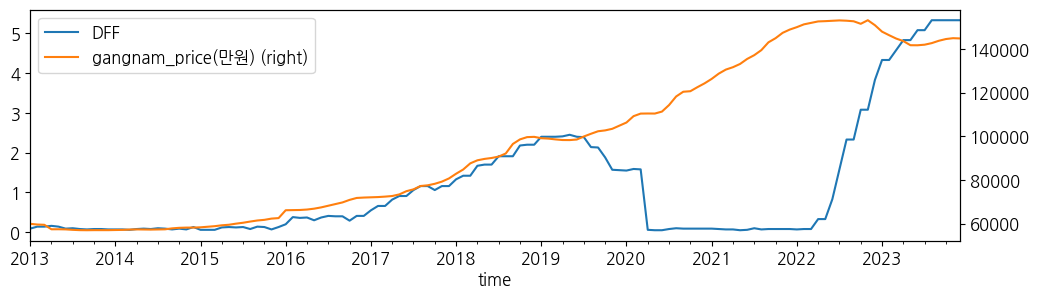

In [179]:
ax = df_merged.plot('time','DFF')
df_merged.plot('time','gangnam_price(만원)',secondary_y=True, ax=ax)

In [180]:
col = ['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS', 'ICSA']
# CORESTICKM159SFRBATL : Sticky Price Consumer Price Index less Food and Energy 고정 가격 소비자 물가 지수 - 식품 및 에너지

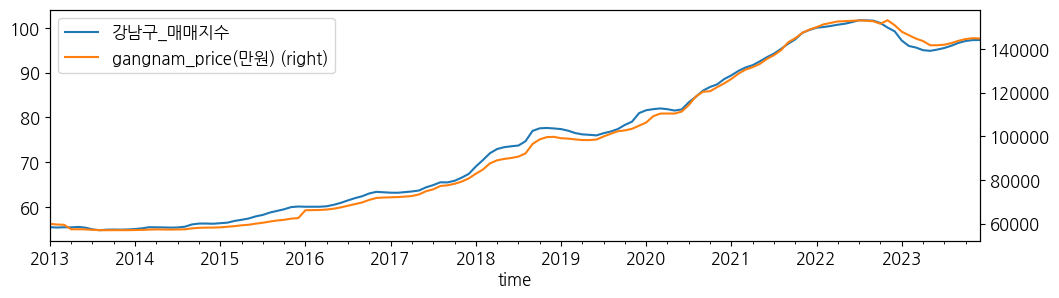

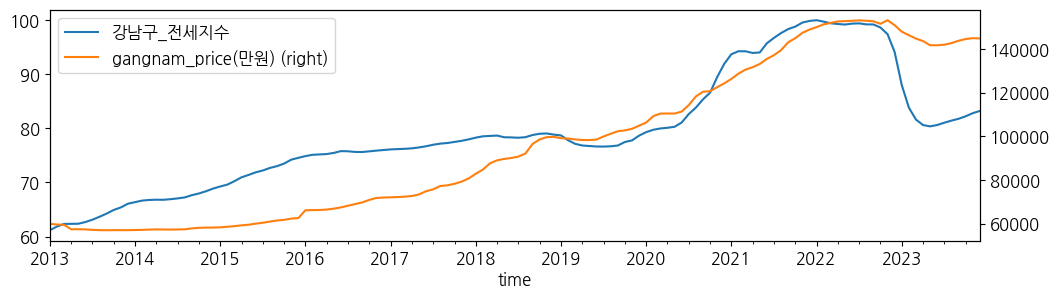

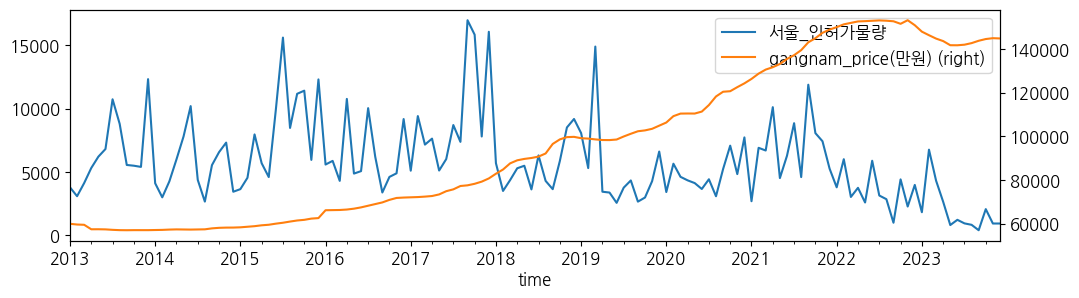

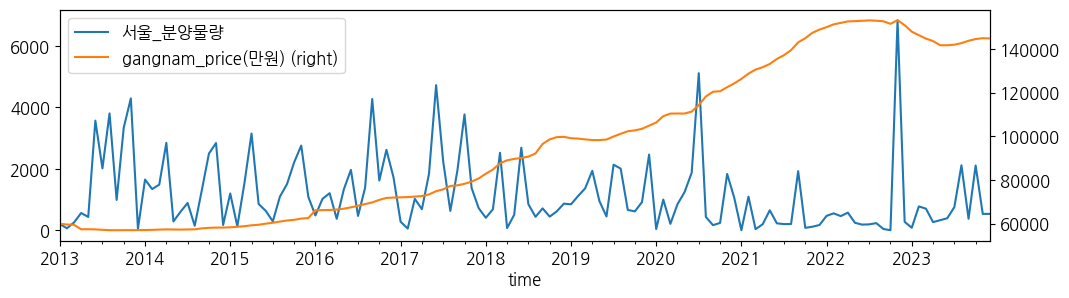

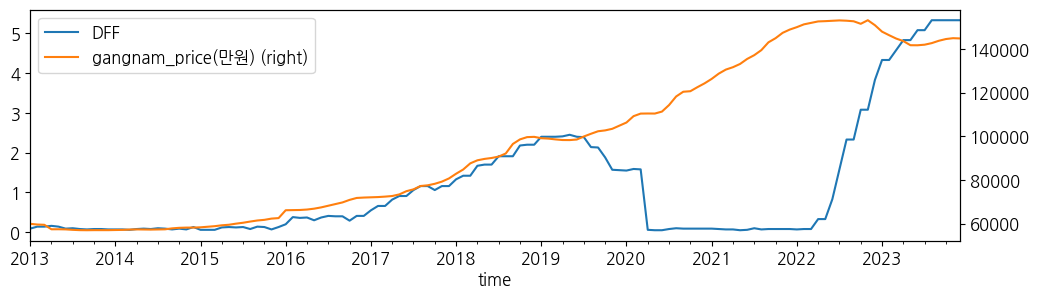

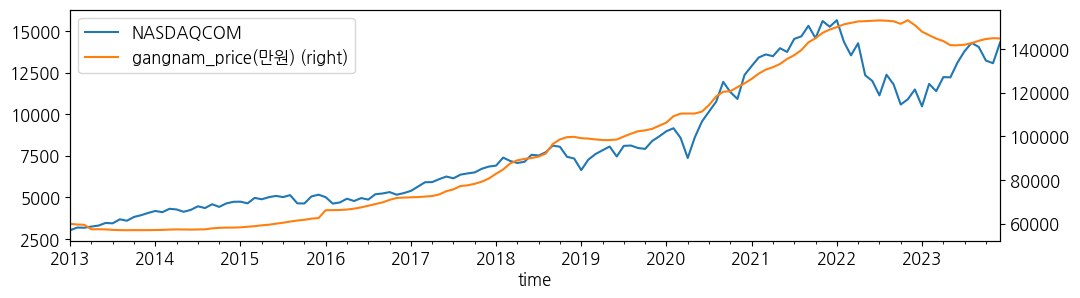

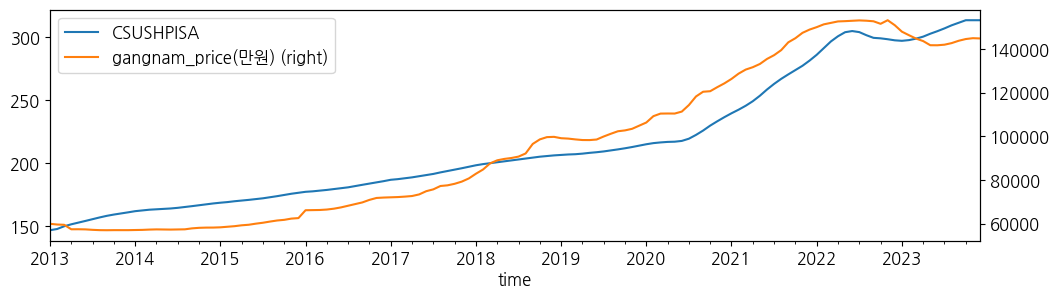

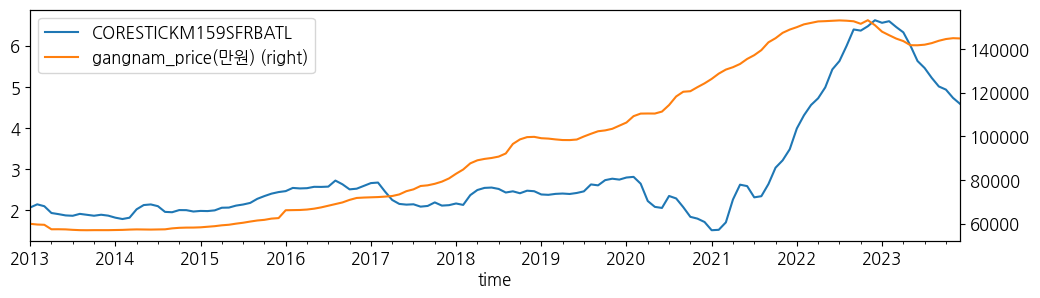

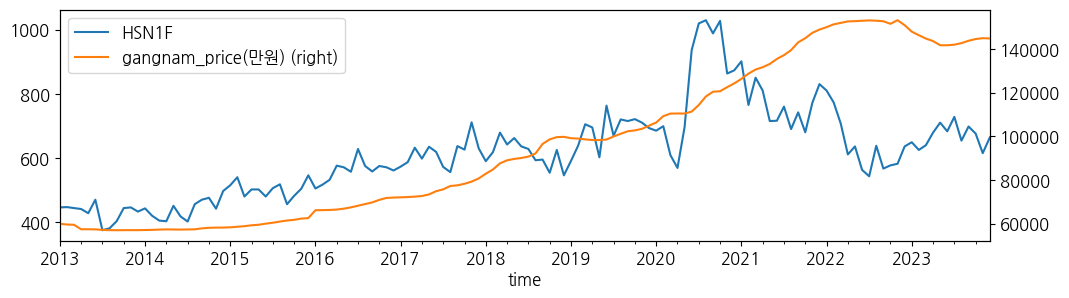

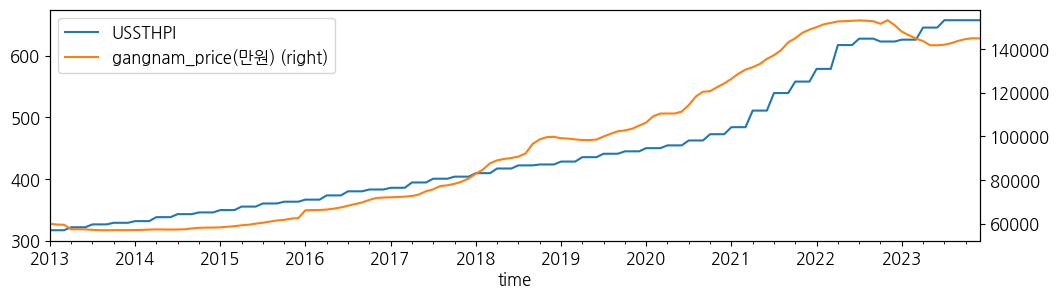

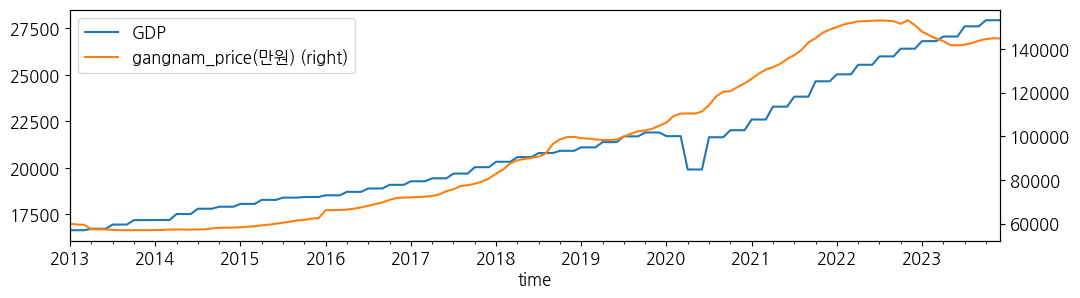

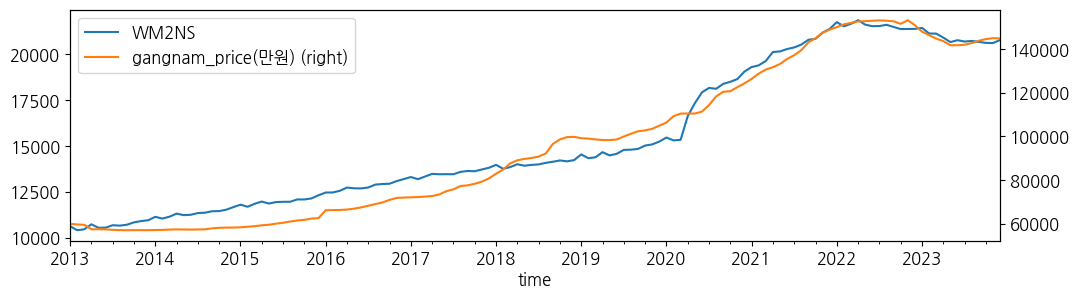

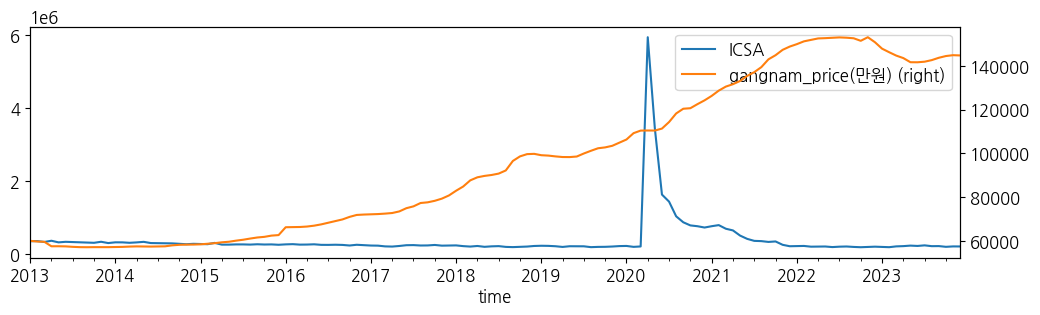

In [181]:
for x in col:
    ax = df_merged.plot('time',x )
    df_merged.plot('time','gangnam_price(만원)',secondary_y=True, ax=ax)

## 다중공선성(multicollinearity)

종속변수(Y)에 영향을 주는 독립변수(X_1, X_2, X_3 ...)들이 서로 다른 독립 변수(X_1, X_2, X_3 ...)에 영향을 주는 경우  
독립 변수들이 서로 독립이 아니라, 서로 상호간의 상관관계가 강한 경우를 말한다.

=> 여기에 맞는 모델을 사용한다.Ridge / Lasso / ElasticNet

[참고블로그](https://velog.io/@cha-suyeon/%ED%98%BC%EA%B3%B5%EB%A8%B8-feature-engineering-%EB%8B%A4%EC%A4%91-%ED%9A%8C%EA%B7%80)

<Figure size 1500x1500 with 0 Axes>

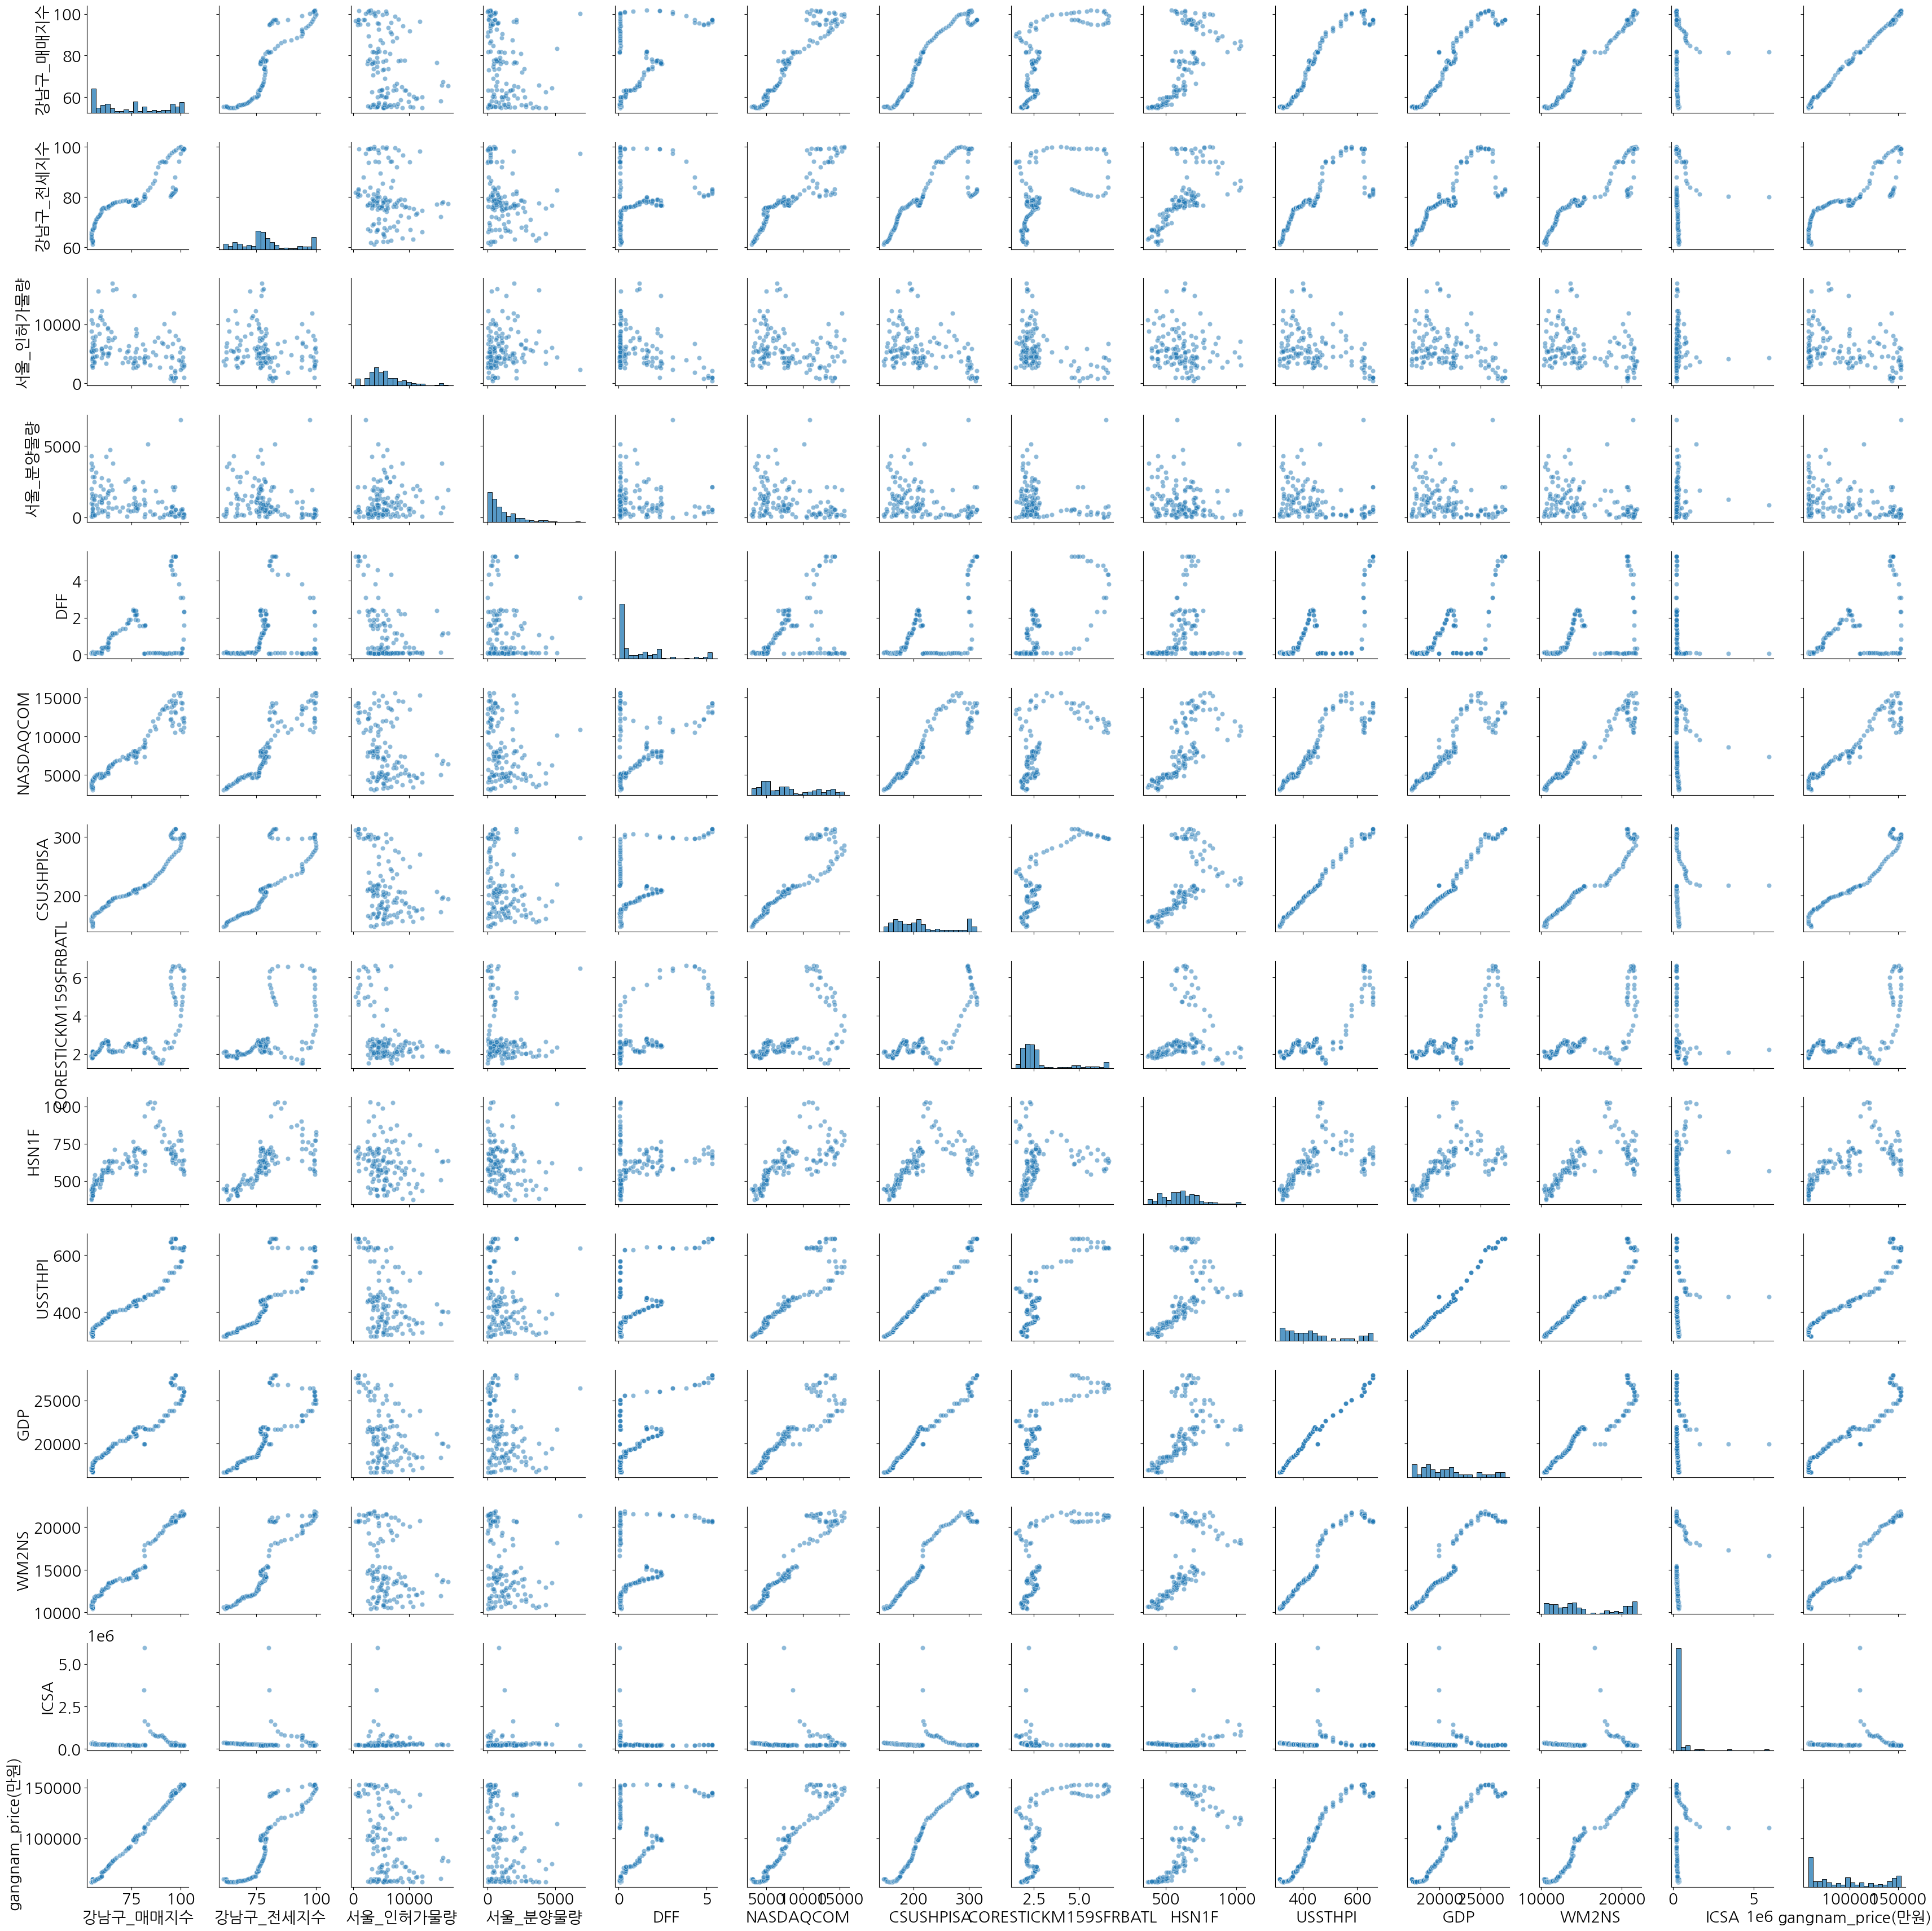

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# 플롯의 크기를 조절
plt.figure(figsize=(15, 15))
plt.rc('font', size=20)

# pairplot 그리기
sns.pairplot(df_merged, 
#              diag_kind='kde',
#              hue="species",
#              palette='bright',
             plot_kws={'alpha': 0.5}, 
             diag_kws={'bins': 20})

# x 축과 y 축 이름의 크기를 크게 조절
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 그래프 표시
plt.show()